In [1]:
import numpy as np
import math
import seaborn as sns

In [2]:
SIGMA = 1.5 # utility parameter
BETA = 0.95 # 
DELTA = 0.1 # 
ALPHA = 0.3 # 
DEV = 0.9 # maximal deviation from steady state
EPSILON = 1e-6 # convergence parameter
N = 1000 # number of data points in the grid

analytical soulition of stationary kapital and consumtion

In [3]:
# steady state value of k
kss = ((DELTA-1+(1/BETA))/ALPHA)**(1/(ALPHA-1))
kss


2.6257456456982027

In [4]:
# steady consumption
css = kss*(kss**(ALPHA-1)-DELTA)
css

1.073331114820493

compute the grid search

In [5]:
kmin = (1 - DEV)*kss # grid's lower bound
kmax = (1 + DEV)*kss # grid's upper bound
kmin, kmax

(0.2625745645698202, 4.988916726826585)

In [6]:
dk = (kmax - kmin)/(N-1) # compute distance between two consecutive data points on the grid (step size)
kgrid = np.arange(kmin, kmax+dk, dk) # build the grid as a COLUMN vector

vectors for value function, decision rule and Bellman operator

In [7]:
'''
Define initial condition for value function. As we know from Contraction Mapping Theorem, this could be anything.
To start with, you could leave the vector of zeros as initial condition and later on think about something better
'''
v = np.zeros(N) # value function
dr = np.zeros(N) # decision rule
Bv = np.zeros(N) # Bellman operator

functions for utility, production and distance

In [8]:
def u(c) : return (c**(1-SIGMA))/(1-SIGMA) # 
def F(k) : return k**ALPHA + (1-DELTA)*k #
def dist(a,b) : return max(abs(a-b)) #

In [9]:
crit = 1 # could be anything bigger than stopping criterion - the algorithm will keep iterating until crit < epsi
iter = 0 # iteration counter (not really needed, just FYI)

non-optimized

In [10]:
while crit > EPSILON:
    v = Bv.copy() # update the value function

    #tmp = [u(F(k) - kgrid) + v*BETA for k in kgrid]
    tmp = np.zeros(N) 
    for i, k in enumerate(kgrid):
        c = F(k) - kgrid
        tmp[i] = u(c) + v*BETA

    rd = np.argmax(tmp, axis=-1)
    Bv = np.max(tmp, axis=-1)
    # Bv = np.take_along_axis(tmp,np.expand_dims(rd, axis=-1),-1).squeeze(axis=-1)
    
    crit = dist(Bv,v) # compute convergence criterion

    print(crit)

C:\Users\martin.ranieri\AppData\Local\Temp\ipykernel_6828\3902570932.py:1: RuntimeWarning: invalid value encountered in power
  def u(c) : return (c**(1-SIGMA))/(1-SIGMA) #


In [52]:
c =  [ F(kgrid[i]) - kgrid[rd[i]] for i in range(N)]
kk = [ F(kgrid[i]) - c[i]  for i in range(N)]

c:\Users\martin.ranieri\OneDrive - Università degli Studi di Milano\Desktop\MASSARO CM\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\martin.ranieri\OneDrive - Università degli Studi di Milano\Desktop\MASSARO CM\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

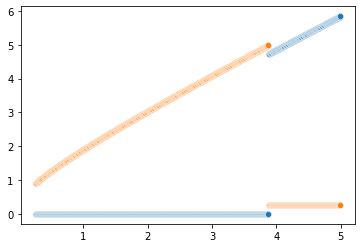

In [53]:
sns.scatterplot(kgrid,c)
sns.scatterplot(kgrid,kk)

optimized

In [54]:
while crit > EPSILON: # Matlab will keep doing whatever you write between "while" and "end" as long as crit > epsi (i.e. until convergence is reached)
    
    v = Bv # update the value function

    for i, k in enumerate(kgrid):

        ceil = math.floor((F(k) - kmin) / dk)
        
        c = F(k) - kgrid
        Bv[i] = max(u(c) + BETA*v)
    
    crit = dist(Bv,v) # compute convergence criterion

In [55]:
def phi(k) : return k/2

In [56]:
k1 = 100 # compute optimal next period capital choice at each grid point (recall that you have save the position of optimal k' at each grid point in vector dr)
c = phi(k1) # compute optimal consumption at each grid point